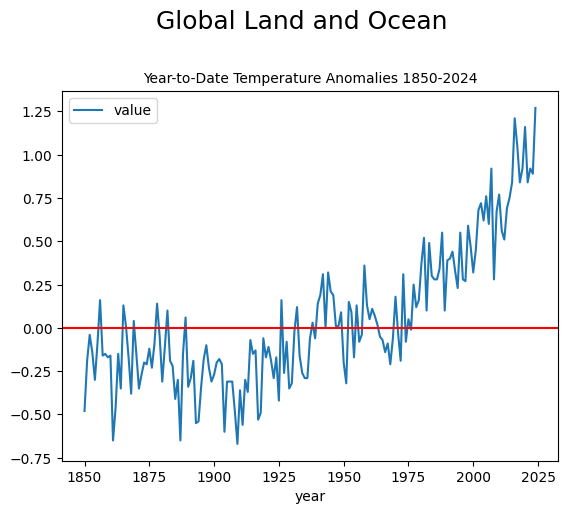

In [25]:
# **********************************************************************
#        urllib.request, Beautiful soup and webscraping                #
# **********************************************************************
from urllib import request

import pandas as pd
from bs4 import BeautifulSoup
import json

# Retrieve the HTML content from the desired URL:
url = 'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/1/1850-2024/data.json'
html = request.urlopen(url).read()

# Create a BeautifulSoup object to parse the HTML:
soup = BeautifulSoup(html, 'html.parser')

# Convert the HTML content to a JSON object using the json.loads() function:
anomalies = json.loads(soup.text)
"""
print(f"The keys are: {list(anomalies.keys())}")
print()


print("year      value")
print("-" * 17)
for year, value in anomalies['data'].items():
    year, value = int(year), float(value)
    print(f'{year}   | {value:6.2f}')
"""
print()

# Advanced python pandas, matplotlib and data science
# create some empty datatypes to create the dataframe
climate_data = {}
years = []
values = []
for year, value in anomalies['data'].items():
    years.append(year)
    values.append(value)

# turn into a dataframe using .DataFrame() method
climate_data = pd.DataFrame({'year': years, 'value': values})
climate_data.head(5)

print()

# let's  plot the dataset
import matplotlib.pyplot as plt
# explicit conversion of the datatypes
climate_data['year'] = pd.to_numeric(climate_data['year'])
climate_data['value'] = pd.to_numeric(climate_data['value'])
# plot the dataset
fig = climate_data.plot(kind='line',
                  y='value',
                  x='year',
                  title="")
plt.suptitle("Global Land and Ocean", y=1.05, fontsize=18)
plt.axhline(y=0, color='r', linestyle='-')
plt.title(f"Year-to-Date Temperature Anomalies {climate_data['year'].min()}-{climate_data['year'].max()}", fontsize=10);


In [26]:
# run a summary statistics on the dataset
climate_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,175.0,1937.000000,50.662281,1850.00,1893.50,1937.00,1980.50,2024.00
value,175.0,0.046857,0.399062,-0.67,-0.21,-0.06,0.28,1.27
